In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

### Upload aggregated overall suicide rates during 2012 to 2016

In [3]:
suicide_overall = pd.read_csv(r'Overall_Suicide_Aggregated/overall_2016_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_overall = suicide_overall.drop("Notes",1)
suicide_overall = suicide_overall.dropna(how = 'any')
suicide_overall['Deaths']=suicide_overall['Deaths'].astype(int)
suicide_overall['Population']=suicide_overall['Population'].astype(int)
suicide_overall['SuicideDeathRate'] = (suicide_overall['Deaths'] / suicide_overall['Population'])*100000
suicide_overall.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,53,276918,19.1,19.139240
1,"Baldwin County, AL",01003,207,998713,20.7,20.726675
2,"Barbour County, AL",01005,16,133618,Unreliable,11.974435
3,"Bibb County, AL",01007,20,112841,17.7,17.724054
4,"Blount County, AL",01009,52,288794,18.0,18.005914


### Upload aggregated firearm suicide rates during 2012 to 2016

In [4]:
suicide_firearm = pd.read_csv(r'Firearm_Suicide_Aggregated/firearm_2016_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_firearm = suicide_firearm.drop("Notes",1)
suicide_firearm = suicide_firearm.dropna(how = 'any')
suicide_firearm['Deaths']=suicide_firearm['Deaths'].astype(int)
suicide_firearm['Population']=suicide_firearm['Population'].astype(int)
suicide_firearm['SuicideDeathRate'] = (suicide_firearm['Deaths'] / suicide_firearm['Population'])*100000
suicide_firearm.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,38,276918,13.7,13.722474
1,"Baldwin County, AL",01003,128,998713,12.8,12.816495
2,"Barbour County, AL",01005,10,133618,Unreliable,7.484022
3,"Bibb County, AL",01007,15,112841,Unreliable,13.293041
4,"Blount County, AL",01009,38,288794,13.2,13.158168


### Upload aggregated non-firearm suicide rates during 2013 to 2017

In [5]:
suicide_nonfirearm = pd.read_csv(r'Nonfirearm_Suicide_Aggregated/nonfirearm_2016_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_nonfirearm = suicide_nonfirearm.drop("Notes",1)
suicide_nonfirearm = suicide_nonfirearm.dropna(how = 'any')
suicide_nonfirearm['Deaths']=suicide_nonfirearm['Deaths'].astype(int)
suicide_nonfirearm['Population']=suicide_nonfirearm['Population'].astype(int)
suicide_nonfirearm['SuicideDeathRate'] = (suicide_nonfirearm['Deaths'] / suicide_nonfirearm['Population'])*100000
suicide_nonfirearm.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,15,276918,Unreliable,5.416766
1,"Baldwin County, AL",01003,79,998713,7.9,7.910180
2,"Blount County, AL",01009,14,288794,Unreliable,4.847746
3,"Calhoun County, AL",01015,21,580179,3.6,3.619573
4,"Chambers County, AL",01017,10,170268,Unreliable,5.873094


In [6]:
amount = [suicide_overall.shape[0], suicide_firearm.shape[0], suicide_nonfirearm.shape[0]]
data = {'Suicide Type': ['overall', 'firearm', 'nonfirearm'],
       'County Amount': amount}
df_amount = pd.DataFrame(data)
df_amount

,Suicide Type,County Amount
0,overall,2351
1,firearm,1947
2,nonfirearm,1433


### make up the missing non-firearm death records as many as possible

In [7]:
FS = suicide_firearm[['County Code', 'Deaths']]
FS = FS.rename(columns = {'County Code': 'fips', 'Deaths': 'Deaths_FS'})
NFS = suicide_nonfirearm[['County Code', 'Deaths']]
NFS = NFS.rename(columns = {'County Code': 'fips', 'Deaths': 'Deaths_NFS'})
suicide = suicide_overall[['County', 'County Code', 'Deaths', 'Population']]
suicide = suicide.rename(columns = {'County Code': 'fips'})

In [8]:
FS.head()

,fips,Deaths_FS
0,01001,38
1,01003,128
2,01005,10
3,01007,15
4,01009,38


In [9]:
NFS.head()

,fips,Deaths_NFS
0,01001,15
1,01003,79
2,01009,14
3,01015,21
4,01017,10


In [10]:
suicide.head()

,County,fips,Deaths,Population
0,"Autauga County, AL",01001,53,276918
1,"Baldwin County, AL",01003,207,998713
2,"Barbour County, AL",01005,16,133618
3,"Bibb County, AL",01007,20,112841
4,"Blount County, AL",01009,52,288794


In [11]:
suicide = suicide.merge(FS, on = 'fips', how = 'left')
suicide = suicide.merge(NFS, on = 'fips', how = 'left')
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,53,276918,38.0,15.0
1,"Baldwin County, AL",01003,207,998713,128.0,79.0
2,"Barbour County, AL",01005,16,133618,10.0,NaN
3,"Bibb County, AL",01007,20,112841,15.0,NaN
4,"Blount County, AL",01009,52,288794,38.0,14.0


In [12]:
suicide['Deaths_NFS'] = suicide['Deaths'] - suicide['Deaths_FS']
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,53,276918,38.0,15.0
1,"Baldwin County, AL",01003,207,998713,128.0,79.0
2,"Barbour County, AL",01005,16,133618,10.0,6.0
3,"Bibb County, AL",01007,20,112841,15.0,5.0
4,"Blount County, AL",01009,52,288794,38.0,14.0


In [13]:
suicide['Deaths_FS'] = suicide['Deaths'] - suicide['Deaths_NFS']
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,53,276918,38.0,15.0
1,"Baldwin County, AL",01003,207,998713,128.0,79.0
2,"Barbour County, AL",01005,16,133618,10.0,6.0
3,"Bibb County, AL",01007,20,112841,15.0,5.0
4,"Blount County, AL",01009,52,288794,38.0,14.0


In [14]:
suicide_overall = suicide[['County', 'fips', 'Deaths', 'Population']]
suicide_overall['SuicideDeathRate'] = (suicide_overall['Deaths'] / suicide_overall['Population'])*100000
suicide_overall.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,53,276918,19.139240
1,"Baldwin County, AL",01003,207,998713,20.726675
2,"Barbour County, AL",01005,16,133618,11.974435
3,"Bibb County, AL",01007,20,112841,17.724054
4,"Blount County, AL",01009,52,288794,18.005914


In [15]:
suicide_firearm = suicide[['County', 'fips', 'Deaths_FS', 'Population']]
suicide_firearm = suicide_firearm.rename(columns = {'Deaths_FS': 'Deaths'})
suicide_firearm['SuicideDeathRate'] = (suicide_firearm['Deaths'] / suicide_firearm['Population'])*100000
suicide_firearm.head()

,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,38.0,276918,13.722474
1,"Baldwin County, AL",01003,128.0,998713,12.816495
2,"Barbour County, AL",01005,10.0,133618,7.484022
3,"Bibb County, AL",01007,15.0,112841,13.293041
4,"Blount County, AL",01009,38.0,288794,13.158168


In [16]:
suicide_nonfirearm = suicide[['County', 'fips', 'Deaths_NFS', 'Population']]
suicide_nonfirearm = suicide_nonfirearm.rename(columns = {'Deaths_NFS': 'Deaths'})
suicide_nonfirearm['SuicideDeathRate'] = (suicide_nonfirearm['Deaths'] / suicide_nonfirearm['Population'])*100000
suicide_nonfirearm.head()

,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,15.0,276918,5.416766
1,"Baldwin County, AL",01003,79.0,998713,7.910180
2,"Barbour County, AL",01005,6.0,133618,4.490413
3,"Bibb County, AL",01007,5.0,112841,4.431014
4,"Blount County, AL",01009,14.0,288794,4.847746


In [17]:
suicide_overall = suicide_overall.dropna()
suicide_firearm = suicide_firearm.dropna()
suicide_nonfirearm = suicide_nonfirearm.dropna()

In [18]:
amount = [suicide_overall.shape[0], suicide_firearm.shape[0], suicide_nonfirearm.shape[0]]
data = {'Suicide Type': ['overall', 'firearm', 'nonfirearm'],
       'County Amount': amount}
df_amount = pd.DataFrame(data)
df_amount

,Suicide Type,County Amount
0,overall,2351
1,firearm,1947
2,nonfirearm,1947


In [19]:
suicide_overall['Suicide Type'] = 'Overall'
suicide_firearm['Suicide Type'] = 'Firearm'
suicide_nonfirearm['Suicide Type'] = 'Nonfirearm'

In [20]:
frames = [suicide_overall, suicide_firearm, suicide_nonfirearm]
suicide = pd.concat(frames)
suicide['year'] = '2016'
suicide.head()

,County,fips,Deaths,Population,SuicideDeathRate,Suicide Type,year
0,"Autauga County, AL",01001,53.0,276918,19.139240,Overall,2016
1,"Baldwin County, AL",01003,207.0,998713,20.726675,Overall,2016
2,"Barbour County, AL",01005,16.0,133618,11.974435,Overall,2016
3,"Bibb County, AL",01007,20.0,112841,17.724054,Overall,2016
4,"Blount County, AL",01009,52.0,288794,18.005914,Overall,2016


In [21]:
suicide.shape

(6245, 7)

In [22]:
suicide.to_csv('suicide_all_types_2016.csv')

## uploading environmental data

In [19]:
ur_files = ddf.read_csv('Climate_Factors/climate_factors_aggregated_2016.csv', dtype = {'fips': str})
climate = ur_files.compute()
climate = climate.loc[:, ~climate.columns.str.contains('^Unnamed')]
climate = climate.drop(['county'], axis = 1)
climate.head()

,fips,mean_temp,dewpoint,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone
0,01001,66.095557,56.019260,9.448028,4.343912,0.157481,0.136775,0.507143,0.003846,0.0,0.164339,70.010335,65.695598,10.84,0.0
1,01003,68.717124,NaN,NaN,5.604971,0.032803,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,8.46,1.0
2,01005,66.819955,56.554627,9.183390,2.962092,0.133124,0.128376,0.486042,0.011523,0.0,0.216124,69.645285,66.475279,10.20,0.0
3,01007,64.315605,53.853081,9.026965,3.282887,0.163499,0.100740,0.380996,0.007119,0.0,0.146689,68.878157,63.684439,10.52,0.6
4,01009,60.605372,NaN,NaN,4.019954,0.151373,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,11.04,2.2


## uploading social economic data

In [20]:
ur_files = ddf.read_csv('Social_Economic_Factors/Social_Economic_2016.csv', dtype = {'fips': str, 'per_capita_income': float})
social = ur_files.compute()
social = social.loc[:, ~social.columns.str.contains('^Unnamed')]
social = social.drop(['year'], axis = 1)
social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality
0,01001,26168.0,12.266017,13.201338,16.736011,4.923077,18.402025,1.221154,4.552259,13.978456,3.544924,24.316518,34.463856,0.890116,22.948098,20.812367,13.784083,14.632418,11.627822,3.0
1,01003,28069.0,12.993796,10.280394,13.336792,3.064578,22.346392,1.274801,18.322349,18.714851,5.143079,16.821212,24.357769,1.459075,22.188732,19.019097,12.385344,13.831387,13.859957,4.0
2,01005,17249.0,26.373673,27.361723,29.385187,9.745670,33.440534,1.732076,1.516692,16.528895,5.234269,54.114376,39.155825,11.016758,48.055798,23.089351,12.380702,13.759675,12.692568,6.0
3,01007,18988.0,16.453914,20.260317,31.077731,6.285471,30.779877,0.312145,2.173428,14.885699,2.245355,25.234804,27.325455,8.864965,27.723612,22.970937,13.463583,15.417331,12.192096,2.0
4,01009,21033.0,16.534440,20.873024,22.770857,3.957515,27.000849,1.896309,0.796646,17.192916,7.115441,12.342299,27.067907,0.956606,23.148830,19.587897,12.730487,14.103008,12.815403,2.0


## uploading altitude data

In [21]:
ur_files = ddf.read_csv('county_altitude.csv', dtype = {'FIPSCODE': str})
altitude = ur_files.compute()
altitude = altitude.rename(columns = {'FIPSCODE': 'fips', 'elevation': 'altitude'})
altitude = altitude[['fips', 'altitude']]
altitude.head()

,fips,altitude
0,19107,207.03
1,19189,390.25
2,19029,385.95
3,19015,268.98
4,19059,425.89


In [22]:
social = social.merge(altitude, on = 'fips', how = 'left')
social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude
0,01001,26168.0,12.266017,13.201338,16.736011,4.923077,18.402025,1.221154,4.552259,13.978456,...,24.316518,34.463856,0.890116,22.948098,20.812367,13.784083,14.632418,11.627822,3.0,128.66
1,01003,28069.0,12.993796,10.280394,13.336792,3.064578,22.346392,1.274801,18.322349,18.714851,...,16.821212,24.357769,1.459075,22.188732,19.019097,12.385344,13.831387,13.859957,4.0,30.30
2,01005,17249.0,26.373673,27.361723,29.385187,9.745670,33.440534,1.732076,1.516692,16.528895,...,54.114376,39.155825,11.016758,48.055798,23.089351,12.380702,13.759675,12.692568,6.0,122.81
3,01007,18988.0,16.453914,20.260317,31.077731,6.285471,30.779877,0.312145,2.173428,14.885699,...,25.234804,27.325455,8.864965,27.723612,22.970937,13.463583,15.417331,12.192096,2.0,74.90
4,01009,21033.0,16.534440,20.873024,22.770857,3.957515,27.000849,1.896309,0.796646,17.192916,...,12.342299,27.067907,0.956606,23.148830,19.587897,12.730487,14.103008,12.815403,2.0,184.46


In [23]:
climate.shape[0]

3142

In [24]:
social.shape[0]

3220

# Check SHAP value with overall suicide rates in 2332 counties

In [25]:
suicide_social = social.merge(suicide_overall[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
suicide_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,26168.0,12.266017,13.201338,16.736011,4.923077,18.402025,1.221154,4.552259,13.978456,...,34.463856,0.890116,22.948098,20.812367,13.784083,14.632418,11.627822,3.0,128.66,19.139240
1,01003,28069.0,12.993796,10.280394,13.336792,3.064578,22.346392,1.274801,18.322349,18.714851,...,24.357769,1.459075,22.188732,19.019097,12.385344,13.831387,13.859957,4.0,30.30,20.726675
2,01005,17249.0,26.373673,27.361723,29.385187,9.745670,33.440534,1.732076,1.516692,16.528895,...,39.155825,11.016758,48.055798,23.089351,12.380702,13.759675,12.692568,6.0,122.81,11.974435
3,01007,18988.0,16.453914,20.260317,31.077731,6.285471,30.779877,0.312145,2.173428,14.885699,...,27.325455,8.864965,27.723612,22.970937,13.463583,15.417331,12.192096,2.0,74.90,17.724054
4,01009,21033.0,16.534440,20.873024,22.770857,3.957515,27.000849,1.896309,0.796646,17.192916,...,27.067907,0.956606,23.148830,19.587897,12.730487,14.103008,12.815403,2.0,184.46,18.005914


## SHAP

In [26]:
import xgboost
import shap

In [27]:
suicide_social = suicide_social.dropna()
suicide_social.shape[0]

2332

In [28]:
X = suicide_social.iloc[:, 1:-1]
y = suicide_social.iloc[:, -1].array

In [29]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


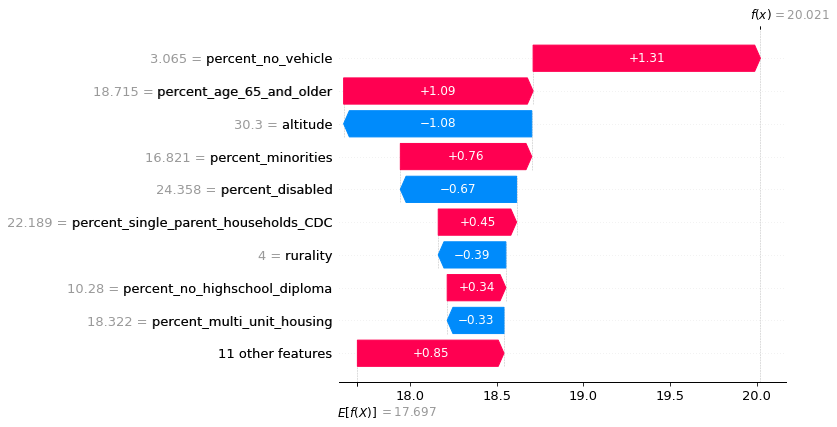

In [30]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

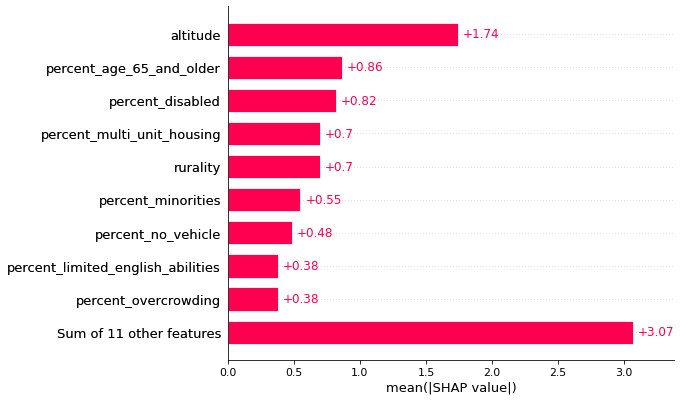

In [31]:
shap.plots.bar(shap_values)

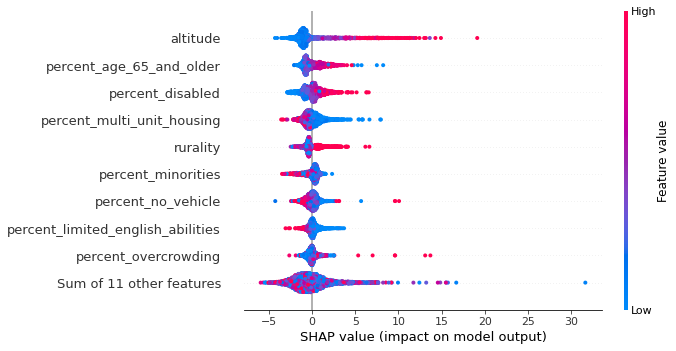

In [32]:
shap.plots.beeswarm(shap_values)

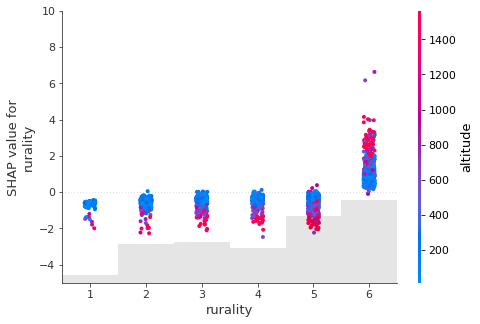

In [33]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 10)

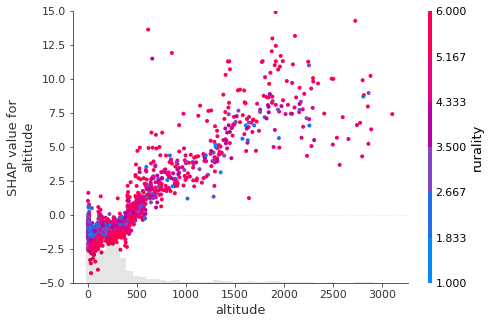

In [34]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

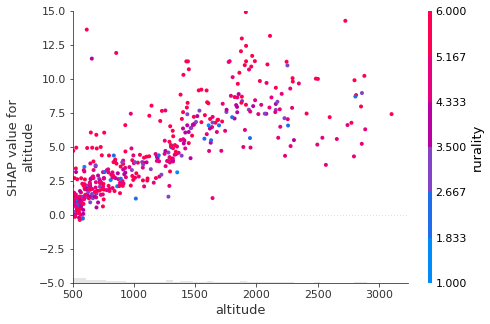

In [37]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15, xmin = 500)

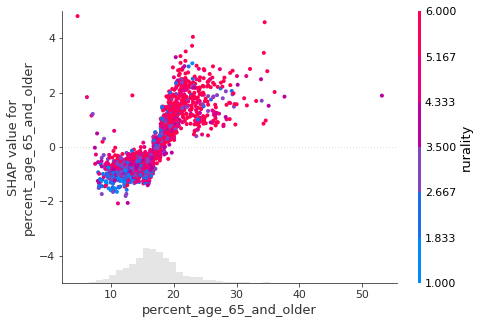

In [38]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

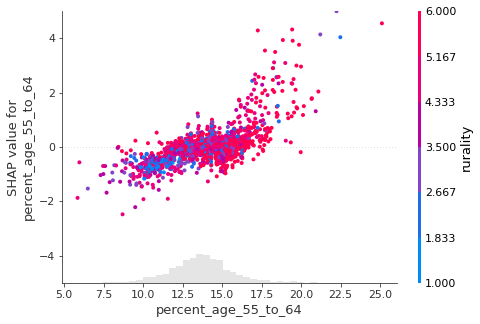

In [39]:
shap.plots.scatter(shap_values[:,"percent_age_55_to_64"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

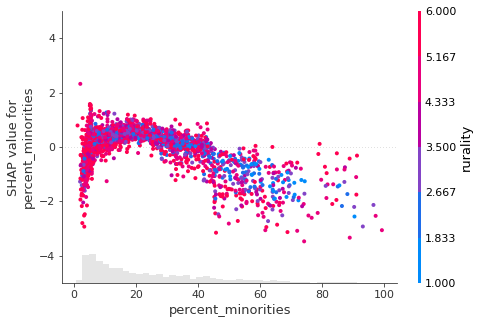

In [40]:
shap.plots.scatter(shap_values[:,"percent_minorities"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

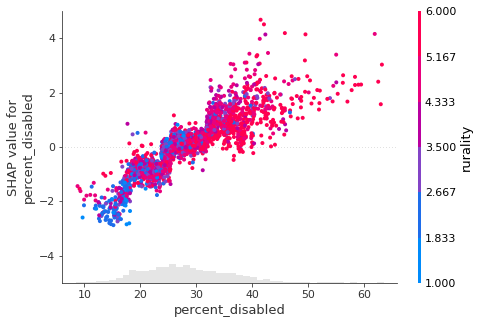

In [41]:
shap.plots.scatter(shap_values[:,"percent_disabled"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

# Check SHAP value with firearm suicide rates in 1930 counties

In [44]:
firearm_social = social.merge(suicide_firearm[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
firearm_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,26168.0,12.266017,13.201338,16.736011,4.923077,18.402025,1.221154,4.552259,13.978456,...,34.463856,0.890116,22.948098,20.812367,13.784083,14.632418,11.627822,3.0,128.66,13.722474
1,01003,28069.0,12.993796,10.280394,13.336792,3.064578,22.346392,1.274801,18.322349,18.714851,...,24.357769,1.459075,22.188732,19.019097,12.385344,13.831387,13.859957,4.0,30.30,12.816495
2,01005,17249.0,26.373673,27.361723,29.385187,9.745670,33.440534,1.732076,1.516692,16.528895,...,39.155825,11.016758,48.055798,23.089351,12.380702,13.759675,12.692568,6.0,122.81,7.484022
3,01007,18988.0,16.453914,20.260317,31.077731,6.285471,30.779877,0.312145,2.173428,14.885699,...,27.325455,8.864965,27.723612,22.970937,13.463583,15.417331,12.192096,2.0,74.90,13.293041
4,01009,21033.0,16.534440,20.873024,22.770857,3.957515,27.000849,1.896309,0.796646,17.192916,...,27.067907,0.956606,23.148830,19.587897,12.730487,14.103008,12.815403,2.0,184.46,13.158168


In [45]:
firearm_social = firearm_social.dropna()
firearm_social.shape[0]

1930

In [46]:
X = firearm_social.iloc[:, 1:-1]
y = firearm_social.iloc[:, -1].array

In [47]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


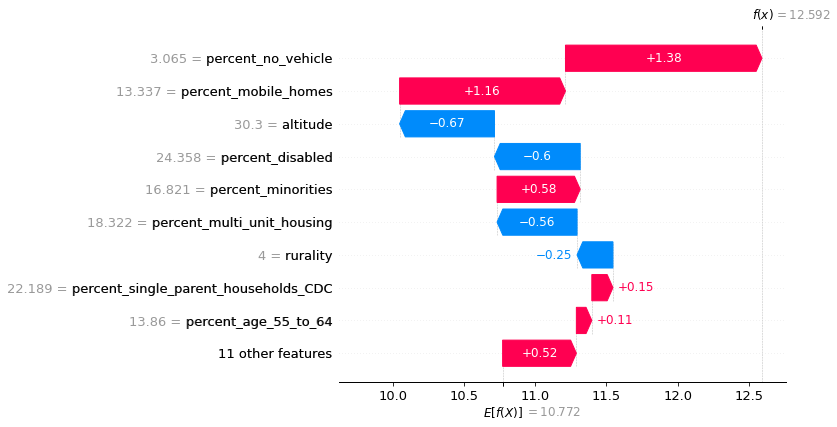

In [48]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

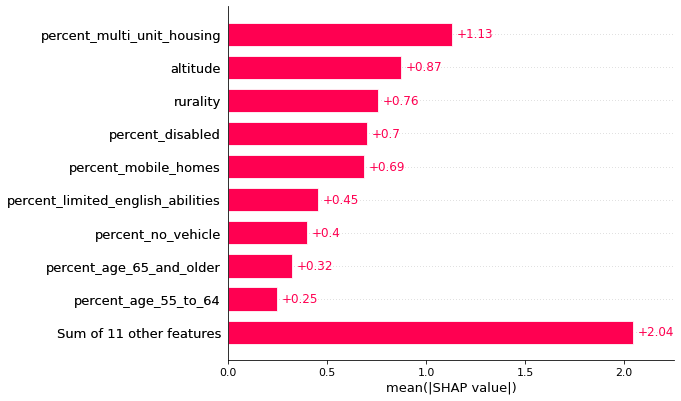

In [49]:
shap.plots.bar(shap_values)

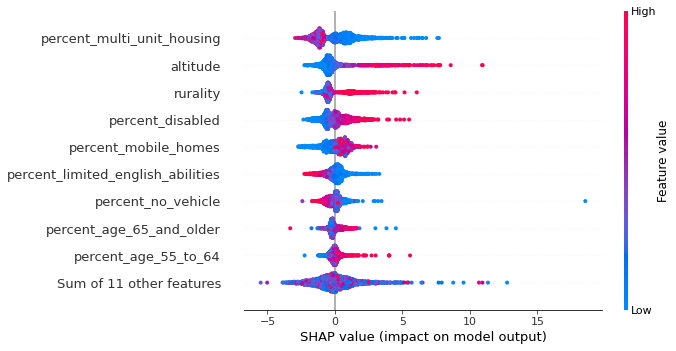

In [50]:
shap.plots.beeswarm(shap_values)

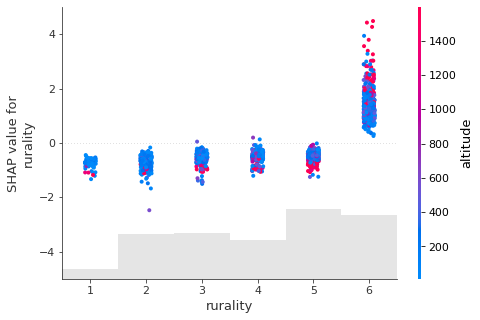

In [51]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)

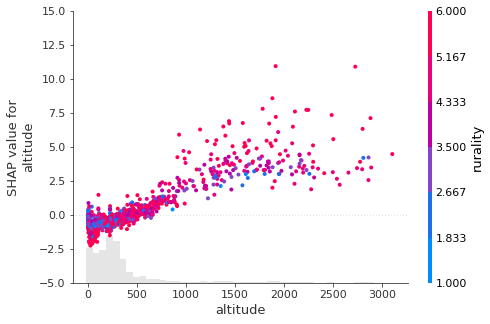

In [52]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

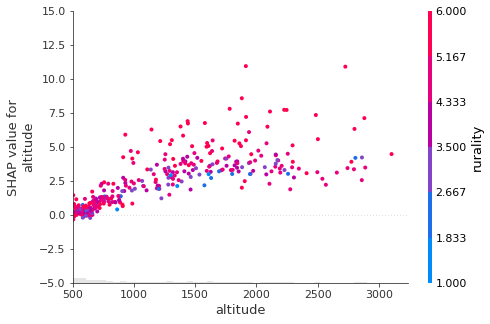

In [53]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15, xmin = 500)

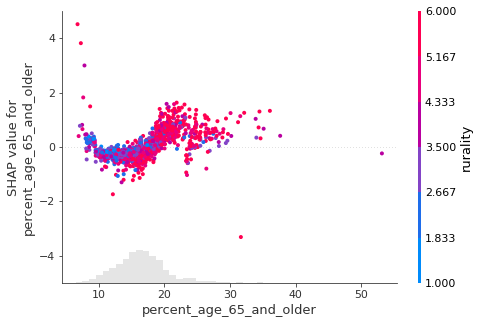

In [54]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

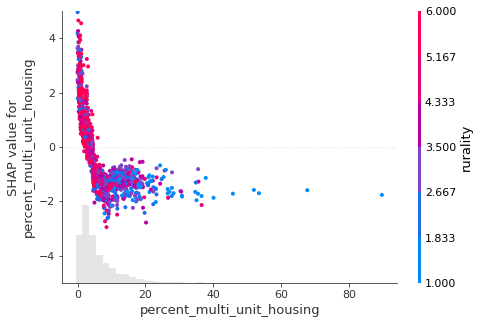

In [55]:
shap.plots.scatter(shap_values[:,"percent_multi_unit_housing"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

# Check SHAP values with nonfirearm suicide rates in 1930 counties

In [56]:
nonfirearm_social = social.merge(suicide_nonfirearm[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
nonfirearm_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,26168.0,12.266017,13.201338,16.736011,4.923077,18.402025,1.221154,4.552259,13.978456,...,34.463856,0.890116,22.948098,20.812367,13.784083,14.632418,11.627822,3.0,128.66,5.416766
1,01003,28069.0,12.993796,10.280394,13.336792,3.064578,22.346392,1.274801,18.322349,18.714851,...,24.357769,1.459075,22.188732,19.019097,12.385344,13.831387,13.859957,4.0,30.30,7.910180
2,01005,17249.0,26.373673,27.361723,29.385187,9.745670,33.440534,1.732076,1.516692,16.528895,...,39.155825,11.016758,48.055798,23.089351,12.380702,13.759675,12.692568,6.0,122.81,4.490413
3,01007,18988.0,16.453914,20.260317,31.077731,6.285471,30.779877,0.312145,2.173428,14.885699,...,27.325455,8.864965,27.723612,22.970937,13.463583,15.417331,12.192096,2.0,74.90,4.431014
4,01009,21033.0,16.534440,20.873024,22.770857,3.957515,27.000849,1.896309,0.796646,17.192916,...,27.067907,0.956606,23.148830,19.587897,12.730487,14.103008,12.815403,2.0,184.46,4.847746


In [57]:
nonfirearm_social = nonfirearm_social.dropna()
nonfirearm_social.shape[0]

1930

In [58]:
X = nonfirearm_social.iloc[:, 1:-1]
y = nonfirearm_social.iloc[:, -1].array

In [59]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


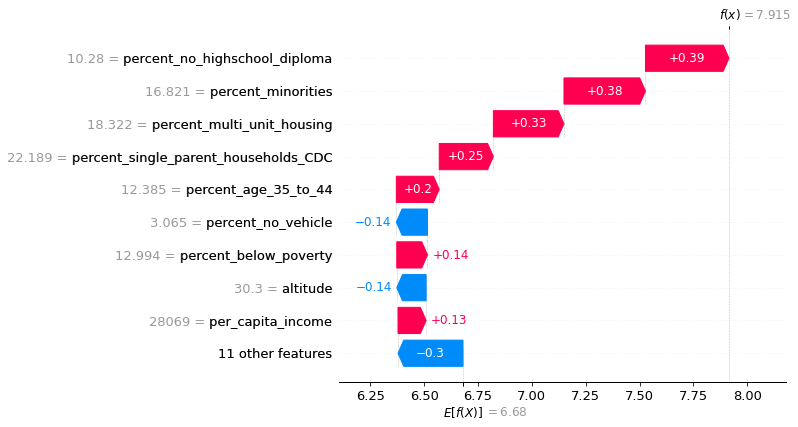

In [60]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

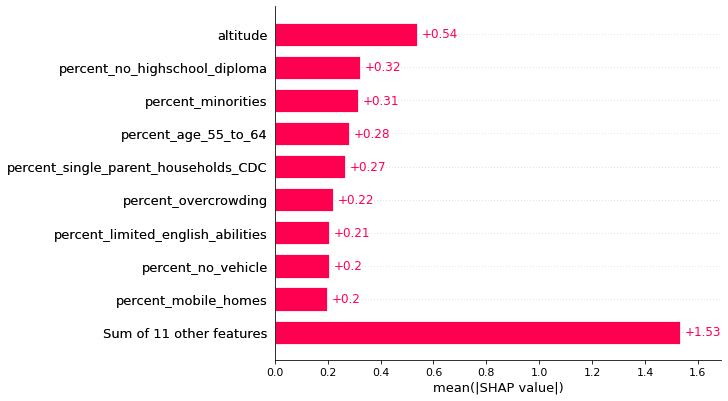

In [61]:
shap.plots.bar(shap_values)

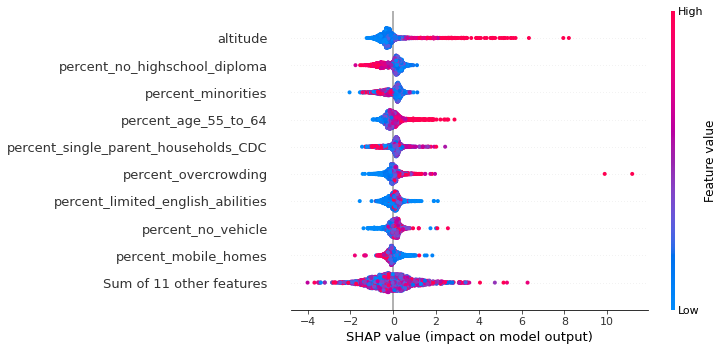

In [62]:
shap.plots.beeswarm(shap_values)

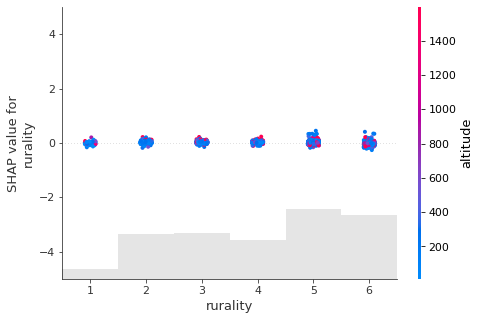

In [63]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)

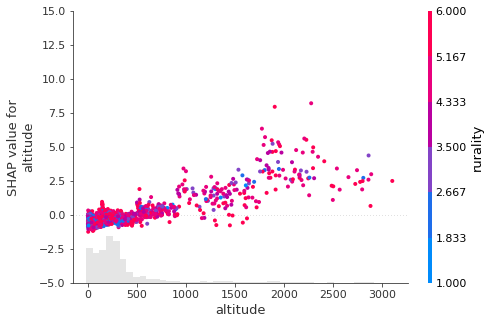

In [64]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

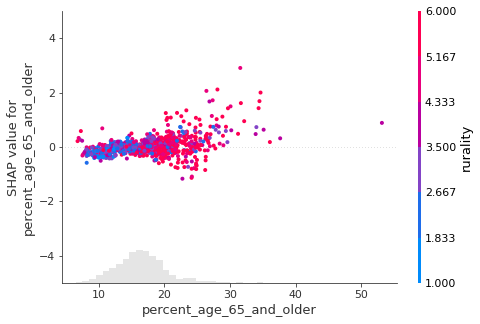

In [65]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

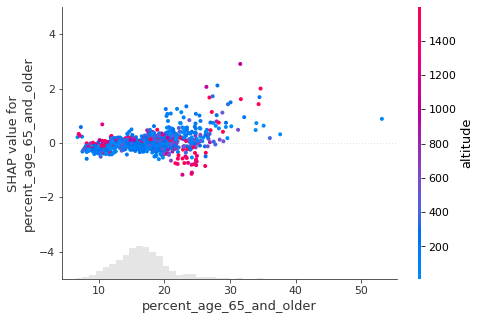

In [66]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)